In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data3/ch2_scores_em.csv',index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [5]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


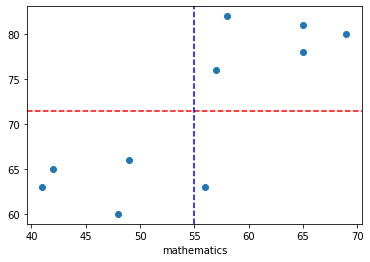

In [15]:
plt.xlabel('english')
plt.xlabel('mathematics')
plt.scatter( scores_df['english'], scores_df['mathematics'])
plt.axhline(scores_df['mathematics'].mean(), color='r', ls='--') # 인자 하나에 대한 수평선을 그어줌 # 수학점수의 평균이라서 가로로 그려짐
plt.axvline(scores_df['english'].mean(), color='b', ls='--')
plt.show()

## 공분산
#### 두 데이터 사이의 관계를 나타내는 지표
#### 공분산의 문제점 : x와 y의 단위의 크기에 영향을 받는다 => 그래서 상관계수로 보완

- '공분산'이란? x의 편차와 y의 편차를 곱한 것의 평균
- 공분산 > 0 : x가 증가할 때 y도 증가한다
- 공분산 < 0 : x가 증가할 때 y는 감소한다
- 공분산 = 0 : 두 변수 간에는 아무런 선형관계가 없으며, 두 변수는 서로 독립적인 관계에 있음을 알 수 있다 (주의 : 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이라고 할 수 없다!)

- 양의 값: 면적이 양의 값이 되는 데이터가 많다 ( + 끼리, 또는 -끼리 곱한다) : 양의 상관 관계

- 음의 값: 면적이 음의 값이 되는 데이터가 많다는 뜻 : 음의 상관 관계 

- 0 에 가까우면 무상관

In [16]:
summary_df = scores_df.copy()

summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation'] # 두 데이터의 편차를 곱함
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [18]:
eng =summary_df['english']
math =summary_df['mathematics']

In [22]:
eng

student
A    42
B    69
C    56
D    41
E    57
F    48
G    65
H    49
I    65
J    58
Name: english, dtype: int64

In [19]:
math

student
A    65
B    80
C    63
D    63
E    76
F    60
G    81
H    66
I    78
J    82
Name: mathematics, dtype: int64

In [23]:
def covariance(X, Y): 
    ax, ay = X.mean(), Y.mean()
    data = [round((ax-x)*(ay-y),2) for x, y in zip(X, Y)]
    print('data:',data)
    return sum(data) / len(X)

In [24]:
covariance(eng, math)

data: [83.2, 120.4, -8.4, 117.6, 9.2, 79.8, 96.0, 32.4, 66.0, 31.8]


62.8

In [25]:
covariance(math, eng )

data: [83.2, 120.4, -8.4, 117.6, 9.2, 79.8, 96.0, 32.4, 66.0, 31.8]


62.8

In [26]:
covariance(math, math)

data: [40.96, 73.96, 70.56, 70.56, 21.16, 129.96, 92.16, 29.16, 43.56, 112.36]


68.44

In [27]:
covariance(eng, eng)

data: [169.0, 196.0, 1.0, 196.0, 4.0, 49.0, 100.0, 36.0, 100.0, 9.0]


86.0

In [30]:
# 공분산 함수 => 결과는 매트릭스 형식으로 출력!

# 매트릭스 형식
# 영영 / 영수 
# 영수 / 수수

# 표본 추출인 경우에는 n-1로 나누는데 
# 지금은 모집단이기 때문에 ddof=0을 준다

# ddof = 0 (모집단 n으로 나눈다)
# ddof = 1 (표본집단 n-1로 나눈다) : 디폴트

np.cov(eng, math, ddof=0) 

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [32]:
# 시리즈 멤버함수 var는 n-1로 나눔
# 참고로 넘파이는 n으로 나눔

# 영어점수와 영어점수와의 공분산은 그냥 영어점수의 분산과 같다!!

eng = summary_df['english'].values
eng.var()

86.0

## 상관계수
#### 단위에 의존하지 않는 상관관계 지표(편차로 나눈다)
#### -1 <= 상관계수 <= 1 

- 확률변수 x,y가 독립이라면 상관계수는 0이다
- x와 y가 선형적 관계라면 상관계수는 1혹은 -1이다

### 상관계수 : 공분산 수치를 표준화
#### 공분산 / (x와 y 각각의 표준편차의 곱)

In [33]:
np.cov(eng, math, ddof=0)[0, 1]

62.800000000000004

In [34]:
np.cov(eng, math, ddof=0)[0, 1] / (np.std(eng)*np.std(math))

56.022878383081874

In [35]:
np.corrcoef(eng, math)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [36]:
# 판다스에서 상관계수를 구할 때

scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


## 회귀